In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Read the data

movies = pd.read_csv("data_set/movies.csv")

In [3]:
# View top 5 data and structure

movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Check for missing data

movies.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# Drop null values

movies = movies.dropna()

In [6]:
# Check again for null values

movies.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [7]:
# Check datatypes of columns

movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# Change budget and gross into int64, due to not needing ".00"

movies['budget'] = movies['budget'].astype('int64')
movies['gross'] = movies['gross'].astype('int64')

In [9]:
# Check types again

movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [11]:
# Look at table

movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [12]:
# Check which movies had the most votes

movies.sort_values(by=['votes'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000,1005973645,Warner Bros.,152.0
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000,28817291,Castle Rock Entertainment,142.0
5643,Inception,PG-13,Action,2010,"July 16, 2010 (United States)",8.8,2100000.0,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,160000000,836836967,Warner Bros.,148.0
2445,Forrest Gump,PG-13,Drama,1994,"July 6, 1994 (United States)",8.8,1900000.0,Robert Zemeckis,Winston Groom,Tom Hanks,United States,55000000,678226133,Paramount Pictures,142.0
3444,Fight Club,R,Drama,1999,"October 15, 1999 (United States)",8.8,1900000.0,David Fincher,Chuck Palahniuk,Brad Pitt,Germany,63000000,101209702,Fox 2000 Pictures,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,Sky Bandits,PG,Action,1986,"October 31, 1986 (United States)",4.6,258.0,Zoran Perisic,Thom Keyes,Scott McGinnis,United Kingdom,18000000,2295500,J&M Entertainment,105.0
802,Fever Pitch,R,Drama,1985,"November 22, 1985 (United States)",4.1,243.0,Richard Brooks,Richard Brooks,Ryan O'Neal,United States,7000000,618847,Metro-Goldwyn-Mayer (MGM),96.0
639,Almost You,R,Comedy,1984,"March 29, 1985 (United States)",5.1,216.0,Adam Brooks,Adam Brooks,Brooke Adams,United States,1000000,95000,Almost You,96.0
449,Getting It on,R,Comedy,1983,August 1983 (United States),3.7,208.0,William Olsen,William Olsen,Martin Yost,United States,220000,975414,Seventh Avenue Films,96.0


In [13]:
# Check which movies had the highest budget

movies.sort_values(by=['budget'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,The Living End,Unrated,Comedy,1992,"August 21, 1992 (United States)",6.5,2900.0,Gregg Araki,Gregg Araki,Mike Dytri,United States,22769,692585,Desperate Pictures,81.0
5114,Paranormal Activity,R,Horror,2007,"October 16, 2009 (United States)",6.3,225000.0,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86.0
2093,El Mariachi,R,Action,1992,"February 26, 1993 (United States)",6.9,64000.0,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81.0
4507,Primer,PG-13,Drama,2004,"May 27, 2005 (Spain)",6.9,101000.0,Shane Carruth,Shane Carruth,Shane Carruth,United States,7000,545436,ERBP,77.0


In [14]:
# Check which movies had the highest gross

movies.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


In [15]:
# View all the companies distinct

movies['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

In [17]:
# Need to see the whole list, set max row none for whole access and run previous code again

pd.set_option('display.max_rows', None)

movies['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

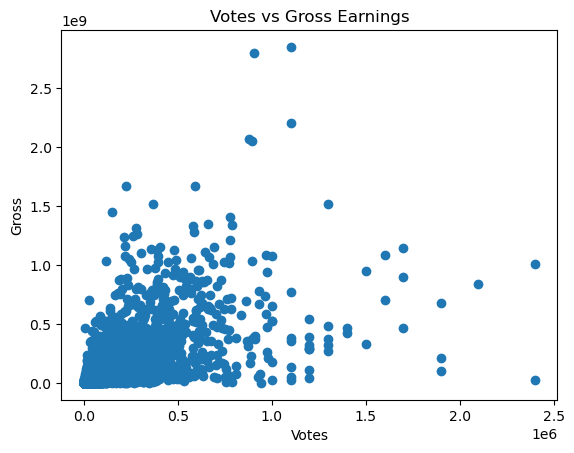

In [33]:
# Check correlation of votes and gross earnings

# Scatter plot 1
# Votes vs Gross

plt.scatter(x=movies['votes'],y=movies['gross'])
plt.title('Votes vs Gross Earnings')

plt.xlabel('Votes')
plt.ylabel('Gross')
plt.show()


<Axes: xlabel='votes', ylabel='gross'>

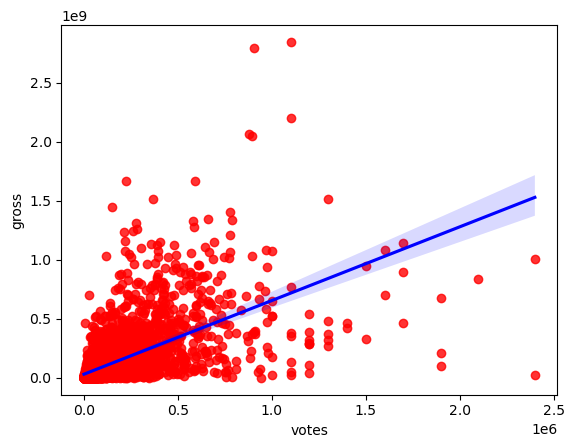

In [32]:
# Plot using seaborn
# Scatter plot 1: Votes vs Gross Earnings

sns.regplot(x='votes',y='gross',data=movies, scatter_kws={"color": 'red'}, line_kws={"color":"blue"})

<Axes: xlabel='budget', ylabel='gross'>

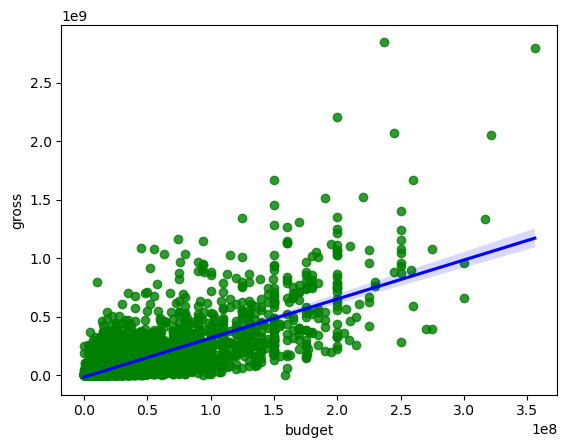

In [31]:
# Scatter plot 2: Gross Earnings vs Budget

sns.regplot(x='budget',y='gross',data=movies, scatter_kws={"color": 'green'}, line_kws={"color":"blue"})

<Axes: xlabel='score', ylabel='gross'>

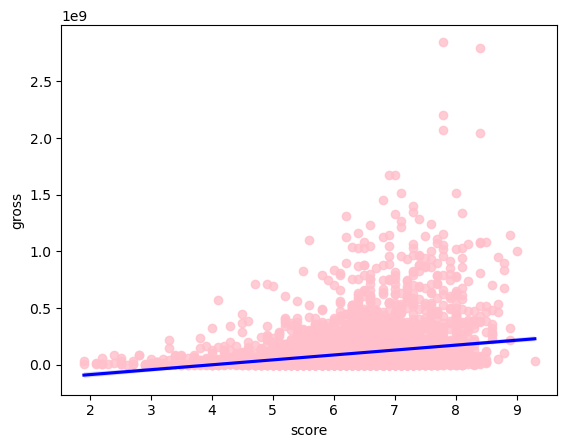

In [28]:
# Scatter plot 3: Gross Earnings vs Score

sns.regplot(x='score',y='gross',data=movies, scatter_kws={"color": 'pink'}, line_kws={"color":"blue"})

In [34]:
# Check correlations

movies.corr()

# correlations that are strong are (gross & budget) and (gross & votes)

C:\Users\voden\AppData\Local\Temp\ipykernel_21708\2799931108.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [35]:
# Assign correlation matrix

correlation_matrix = movies.corr()

C:\Users\voden\AppData\Local\Temp\ipykernel_21708\2560902226.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = movies.corr()


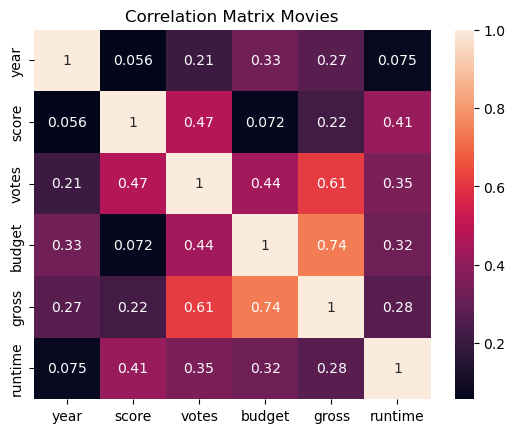

In [38]:
# Create a heatmap to visualize correlations

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Movies')
plt.show()